In [37]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [42]:
class bandit:
    def __init__(self, epsilon, initial_value, k = 10, step_size = 0.1):
        self.epsilon = epsilon
        self.k = k
        self.q_estimates = np.zeros(k) + initial_value
        self.actions = np.array(range(k))
        self.q_true = np.random.randn(k)
        self.times_taken = np.zeros(k)
        self.time = 0
        self.step_size = step_size
        self.initial_value = initial_value

    
    # Returns the index of the action selected via epsilon-greedy
    def select_action(self):
        x = np.random.uniform()
        if x < self.epsilon:
            return np.random.choice(self.actions)
        else:
            return np.argmax(self.q_estimates)
    
    # Get reward and update q_estimate using constant step size method
    def step(self, action):
        # Get reward for action
        reward = np.random.normal(self.q_true[action], 1)
        
        # Increment t, times_taken[action]
        self.time += 1
        self.times_taken[action] += 1
        
        # Constant step-size update
        self.q_estimates[action] += self.step_size*(reward - self.q_estimates[action])   
        
        return reward
    
    # Reset bandit at the beginning of every run
    def reset(self):
        
        self.q_true = np.random.randn(self.k)
        
        self.q_estimates = np.zeros(self.k) + self.initial_value
        
        self.times_taken = np.zeros(self.k)
        
        self.best_action = np.argmax(self.q_true)


In [43]:
def simulate(runs, time, bandits):
    best_action_counts = np.zeros((len(bandits), runs, time))
    rewards = np.zeros(best_action_counts.shape)
    for i, bandit in enumerate(bandits):
        for r in tqdm(range(runs)):
            bandit.reset()
            for t in range(time):
                action = bandit.select_action()
                reward = bandit.step(action)
                rewards[i, r, t] = reward
                if action == bandit.best_action:
                    best_action_counts[i, r, t] = 1
    best_action_counts = best_action_counts.mean(axis = 1)
    rewards = rewards.mean(axis = 1)
    return best_action_counts, rewards
   

In [46]:
def figure_2_3(runs=2000, time=1000):
    k = 10
    bandits = []
    bandits.append(bandit(epsilon = 0,  initial_value = 5))
    bandits.append(bandit(epsilon = 0.1, initial_value = 0))
    best_action_counts, rewards = simulate(runs, time, bandits)

    plt.figure(figsize=(10,10))

    plt.plot(best_action_counts[0], label='Optimistic, greedy')
    plt.plot(best_action_counts[1], label='Realistic, eps-greedy')
    plt.xlabel('steps')
    plt.ylabel('% optimal action')
    plt.legend()
    
    plt.show()


100%|██████████| 2000/2000 [00:12<00:00, 160.48it/s]


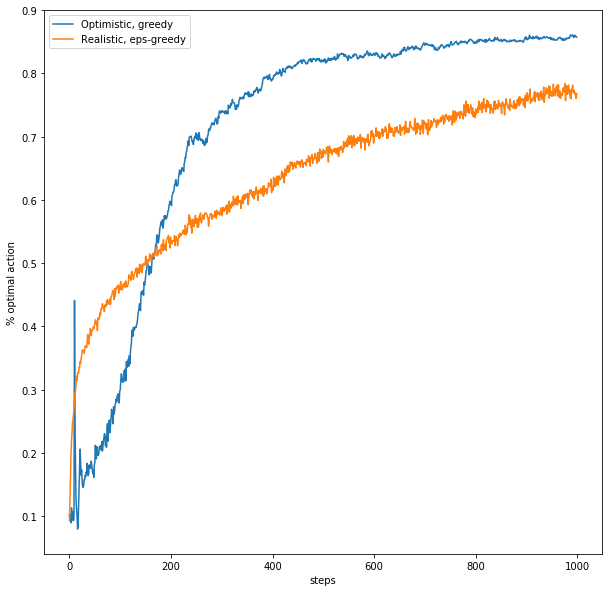

In [47]:
figure_2_3()